In [4]:
import numpy as np
np.random.seed(0)

Weights: [1.65216876]
Bias: 1.4077016755313434


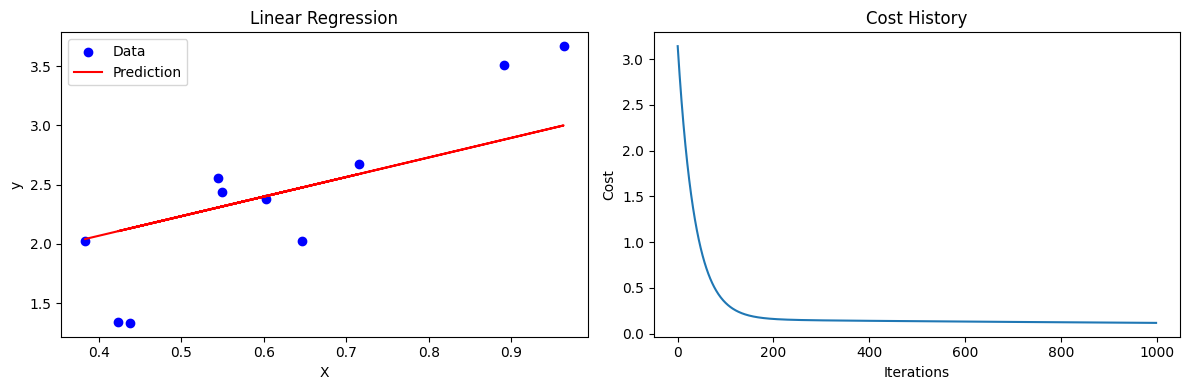

In [72]:
import numpy as np
import matplotlib.pyplot as plt

class LinearRegression:
    def __init__(self, lr=0.01, n_iters=1000):
        self.lr = lr
        self.n_iters = n_iters
        self.weights = None
        self.bias = None
        self.cost_history = []

    def fit(self, X, y):
        n_samples, n_features = X.shape
        
        # Initialize weights and bias
        self.weights = np.zeros((n_features, 1))
        self.bias = 0

        # Reshape y to ensure it's a column vector
        y = y.reshape(-1, 1)

        for _ in range(self.n_iters):
            y_pred = np.dot(X, self.weights) + self.bias
            
            cost = (1 / (2 * n_samples)) * np.sum((y_pred - y) ** 2)
            self.cost_history.append(cost)
            
            dw = (1/n_samples) * np.dot(X.T, (y_pred - y))
            db = (1/n_samples) * np.sum(y_pred - y)
            
            self.weights -= self.lr * dw
            self.bias -= self.lr * db

    def predict(self, X):
        return np.dot(X, self.weights) + self.bias

def generate_data(n_samples, noise=0.1):
    X = np.linspace(0, 10, n_samples).reshape(-1, 1)
    y = 2 * X + 1 + np.random.randn(n_samples, 1) * noise
    return X, y

def plot_results(X, y, y_pred, cost_history):
    plt.figure(figsize=(12, 4))
    
    # Plot the data and prediction
    plt.subplot(121)
    plt.scatter(X, y, color='b', label='Data')
    plt.plot(X, y_pred, color='r', label='Prediction')
    plt.xlabel('X')
    plt.ylabel('y')
    plt.legend()
    plt.title('Linear Regression')
    
    # Plot the cost history
    plt.subplot(122)
    plt.plot(cost_history)
    plt.xlabel('Iterations')
    plt.ylabel('Cost')
    plt.title('Cost History')
    
    plt.tight_layout()
    plt.show()


# # Generate sample data
np.random.seed(0)
X = np.random.rand(10, 1)
noise = np.random.rand(10,1)

y = 3*X[:,0].reshape(-1,1)+noise

# Create and train the model
model = LinearRegression(lr=0.01, n_iters=1000)
model.fit(X, y)

# Make predictions
y_pred = model.predict(X)

# Print results
print(f"Weights: {model.weights.flatten()}")
print(f"Bias: {model.bias}")

# Plot results
plot_results(X, y, y_pred, model.cost_history)


Evaluating for tau = 0.01


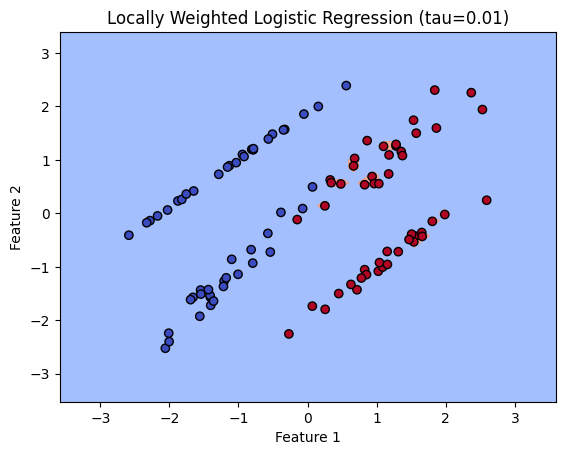

Evaluating for tau = 0.05


/var/folders/yj/2fr85zvn2sbbpv3jsq4y3kwh0000gn/T/ipykernel_5282/3051174260.py:22: RuntimeWarning: divide by zero encountered in log
  term2 = np.sum(w * (y_train * np.log(h) + (1 - y_train) * np.log(1 - h)))
/var/folders/yj/2fr85zvn2sbbpv3jsq4y3kwh0000gn/T/ipykernel_5282/3051174260.py:22: RuntimeWarning: invalid value encountered in multiply
  term2 = np.sum(w * (y_train * np.log(h) + (1 - y_train) * np.log(1 - h)))


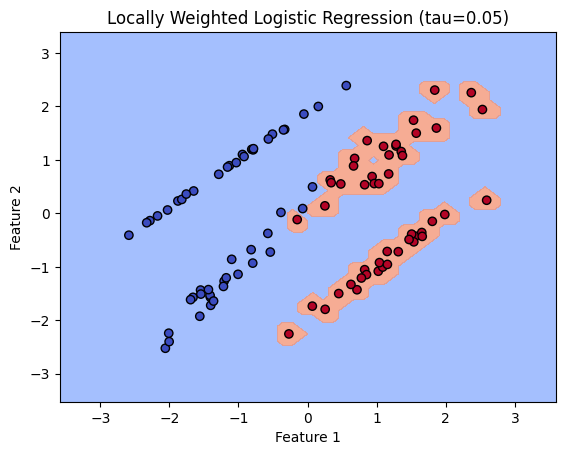

Evaluating for tau = 0.1


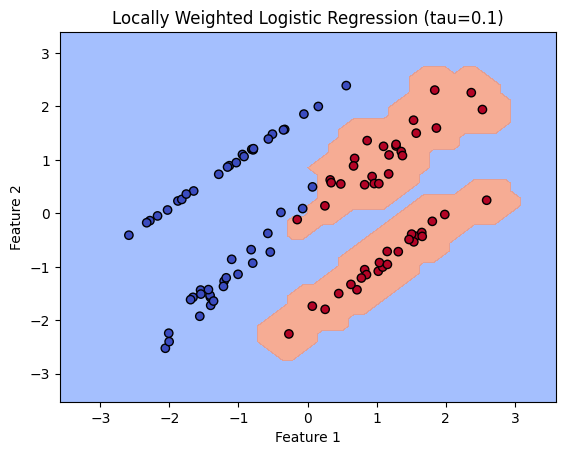

Evaluating for tau = 0.5


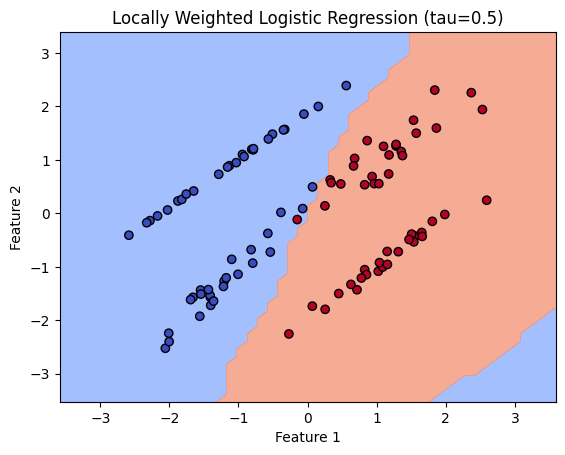

Evaluating for tau = 1.0


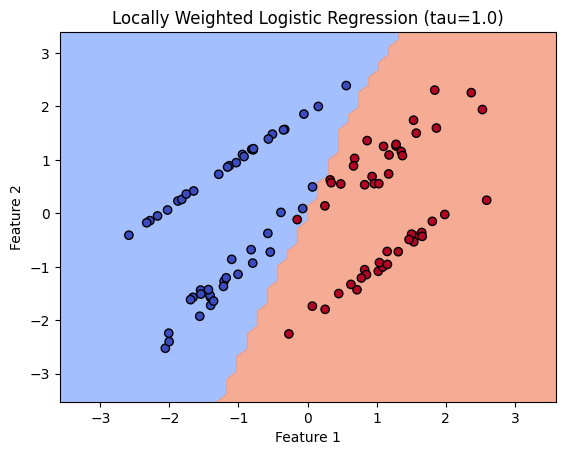

Evaluating for tau = 5.0


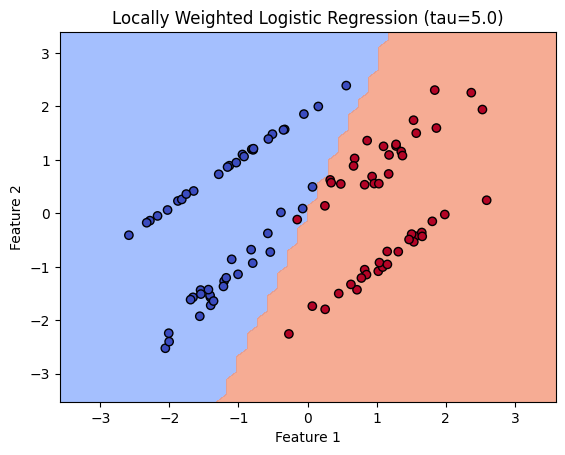

In [73]:
import numpy as np
from scipy.optimize import minimize
import matplotlib.pyplot as plt

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def compute_weights(X_train, x, tau):
    m = X_train.shape[0]
    w = np.exp(-np.linalg.norm(X_train - x, axis=1)**2 / (2 * tau**2))
    return w

def lwlr(X_train, y_train, x, tau, lambda_reg=0.0001):
    m, n = X_train.shape
    w = compute_weights(X_train, x, tau)
    
    theta = np.zeros(n)

    def cost_function(theta):
        h = sigmoid(X_train @ theta)
        term1 = -lambda_reg / 2 * np.sum(theta**2)
        term2 = np.sum(w * (y_train * np.log(h) + (1 - y_train) * np.log(1 - h)))
        return -(term1 + term2)
    
    def gradient(theta):
        h = sigmoid(X_train @ theta)
        z = w * (y_train - h)
        grad = X_train.T @ z - lambda_reg * theta
        return -grad

    def hessian(theta):
        h = sigmoid(X_train @ theta)
        D = -w * h * (1 - h)
        H = X_train.T @ (D[:, np.newaxis] * X_train) - lambda_reg * np.eye(n)
        return H

    res = minimize(cost_function, theta, jac=gradient, hess=hessian, method='trust-ncg')
    theta_opt = res.x

    h_x = sigmoid(x @ theta_opt)
    return h_x > 0.5

def plot_lwlr(X_train, y_train, tau, resolution=50):
    x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
    y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, resolution), np.linspace(y_min, y_max, resolution))
    
    Z = np.array([lwlr(X_train, y_train, np.array([xx_i, yy_i]), tau) for xx_i, yy_i in zip(np.ravel(xx), np.ravel(yy))])
    Z = Z.reshape(xx.shape)
    
    plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.coolwarm)
    plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, edgecolors='k', marker='o', cmap=plt.cm.coolwarm)
    plt.title(f'Locally Weighted Logistic Regression (tau={tau})')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.show()

# Load data (placeholder function, replace with actual data loading)
def load_data():
    # Placeholder: Generate some synthetic data for illustration
    from sklearn.datasets import make_classification
    X, y = make_classification(n_samples=100, n_features=2, n_informative=2, n_redundant=0, random_state=42)
    return X, y

# Main execution for testing
X_train, y_train = load_data()

# Define bandwidth parameters to test
taus = [0.01, 0.05, 0.1, 0.5, 1.0, 5.0]

# Evaluate the system for each tau
for tau in taus:
    print(f'Evaluating for tau = {tau}')
    plot_lwlr(X_train, y_train, tau, resolution=50)  # Use resolution = 50 for faster debugging
